# Numerical Methods 1
### [Gerard Gorman](http://www.imperial.ac.uk/people/g.gorman), [Matthew Piggott](http://www.imperial.ac.uk/people/m.d.piggott), [Christian Jacobs](http://www.christianjacobs.uk)

# Lecture ?: Interpolation

## Learning objectives:

* Learn about standard methods to approximate discrete data points.
* Differences with curve fitting of noisy data.
* Implement methods to compute simple polynomial interpolation.

## Introduction - Approximating functions  (TO-DO!!!!!)

David Ham's example of piecewise constant and piecewise linear approximations to the sine function.





### Interpolation vs curve-fitting

Consider a discrete set of data points 

$$ (x_i,y_i),\quad i=0,\ldots,N,$$

and that we wish to approximate this data in some sense.  The data may be known to be exact (if we wished to approximate a complex function by a simpler expression say), or it may have errors from measurement or observational techniques with known or unknown error bars.

#### Interpolation

**Interpolation** assumes that these data points are exact (e.g. no measurement errors) and at distinct $x$ locations. It aims to fit a function (or curve), $y=f(x)$, to this data which exactly passes through the $N$ discrete points. This means that we have the additional constraint on the $x_s$'s that $$x_0 < x_1 < \ldots < x_N$$ and that $y_i=f(x_i)$, $\forall i$.

In this case the function $f$ is known as the *interpolating function*, or simply the *interpolant*.

#### Curve-fitting

Alternatively, when we have data with noise, or multiple different measurement values ($y$) at a given $x$ then we can't fit a function/curve that goes through all points exactly, and rather have to perform **curve-fitting** - finding a function that approximates the data in some sense by doesn't necessarily hit all points. In this case we no longer have the requirement that $$x_0 < x_1 < \ldots < x_N$$ and can consider the data as a 'cloud of points'.

An example of interpolation would be to simply fit a line between every successive two data points - this is a piecewise-linear (an example of the more general piecewise-polynomial) interpolation.

If we were to construct a single straight line ($y=mx+c$ where we have only two free parameters $m$ and $c$) that, for example, minimised that sum of the squares of the differences to the data, this would be what is known as a *least squares approximation* to the data using a linear function.

An application here could be the *smoothing* of complex or noisy data.

### Choice of interpolating function

Of course we have a lot of choice for how we construct the interpolating or curve-fitting function.  Considerations for how to do this include the smoothness of the resulting function (i.e. how many smooth derivatives it has - cf. the piecewise polynomial case - what does this approximation tell us about the rate of change of the data?), replicating known positivity or periodicity, the cost of evaluating it, etc.

Some choices include: polynomials, piecewise polynomials, trigonometric series (sums of sines and cosines leading to an approximation similar to Fourier series).


### <span style="color:blue">Example: interpolation and curve-fitting in 1D </span>

Suppose we have a small number of discrete data points and wish to fit a piecewise polynomial to it. We can use some in-built Python functions to interpolate/curve-fit and plot the resulting data.

Populating the interactive namespace from numpy and matplotlib


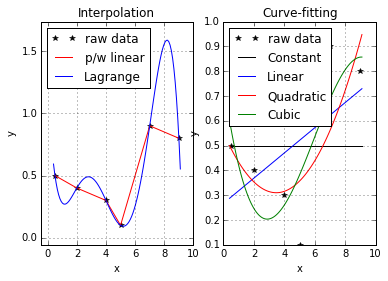

In [1]:
%pylab inline

from matplotlib import pylab
import numpy
import scipy.interpolate

# invent some raw data 
x=numpy.array([0.5,2.0,4.0,5.0,7.0,9.0])
y=numpy.array([0.5,0.4,0.3,0.1,0.9,0.8])

# plot the data as black stars
pylab.subplot(1,2,1)
pylab.title('Interpolation')
pylab.plot(x,y,'k*',label='raw data')
pylab.xlabel('x');pylab.ylabel('y');pylab.grid(True)
pylab.margins(0.1)

# simply using the plot command will produce a 
# piecewise-linear approximation:
pylab.plot(x,y,'r',label='p/w linear')

# --- LAGRANGE INTERPOLATION ---

# use python functions from the scipy library to generate 
# the polynomial that goes through this data - note we will 
# do this oursleves below!
p1=scipy.interpolate.lagrange(x,y)
# evaluate it at higher resolution in x and plot
# this curve
xx=numpy.linspace(0.4,9.1,100)
pylab.plot(xx,p1(xx),'b',label='Lagrange')
# add a legend
pylab.legend(loc=0)

# --- CURVE-FITTING ---

# new subfigure to compare curve-fitting
pylab.subplot(1,2,2)
pylab.title('Curve-fitting')
pylab.plot(x,y,'k*',label='raw data')
pylab.xlabel('x');pylab.ylabel('y');pylab.grid(True)

# now let's fit a polynomial in a least squares sense
poly_coeffs=numpy.polyfit(x,y,0)
# turn the coefficients of the polynomial into a poly
p2 = np.poly1d(poly_coeffs)
pylab.plot(xx,p2(xx),'k',label='Constant')

# linear
poly_coeffs=numpy.polyfit(x,y,1)
# turn the coefficients of the polynomial into a poly
p2 = np.poly1d(poly_coeffs)
pylab.plot(xx,p2(xx),'b',label='Linear')

# quadratic
poly_coeffs=numpy.polyfit(x,y,2)
# turn the coefficients of the polynomial into a poly
p2 = np.poly1d(poly_coeffs)
pylab.plot(xx,p2(xx),'r',label='Quadratic')

# cubic
poly_coeffs=numpy.polyfit(x,y,3)
# turn the coefficients of the polynomial into a poly
p2 = np.poly1d(poly_coeffs)
pylab.plot(xx,p2(xx),'g',label='Cubic')

# add a legend
pylab.legend(loc=0)

### <span style="color:blue">Exercise: error calculation </span>

Write some code to compute the root-mean-square error (RMSE) for each of the cirve-fitting polynomials.


### <span style="color:blue">Exercise: degree of approximation </span>

Try fitting and plotting polynomials of increasing degree past cubic - at what *degree* does the resulting polynomial approximation equate to the Lagrange interpolant?

Why does this make sense? 

[Hint: think about the number of free parameters in a polynomial, and the amount of data you have].

### <span style="color:blue">Exercise: extrapolation </span>

Interpolation allows us to estimate $y$ for values of $x$ within the bounds of the available data (here $[0.5,0]$) with some confidence.

*Extrapolation* on the other hand is the process of estimating (e.g. using the interpolating function) $y$ *outside* the bounds of the available data and is notoriously inaccurate.  Try evaluating the above functions for $x>>9.0$.


## Polynomial interpolation

This is what you saw above - the polynomial that goes through the data points exactly.  We can always find a polynomial of degree $n$ that passes through $n+1$ distinct points.

This polynomial of minimal degree (we can obviously also approximate with additional higher degree polynomials if we wish) is unique and is termed the *Lagrange polynomial* which can be obtained using *Lagrange's method*.

### Lagrange's method

This method starts by considering the following function:

$$P_n(x) = \sum_{i=0}^{n} y_i l_i(x).$$

The $y_i$'s are the data we've been given, and note that to evaluate the LHS at an arbitrary $x$ we need to substitute $x$ into all of the $l_i$ functions where $i$ ranges from $0$ to $n$.

The Lagrange method proceeds by defining the *Lagrange basis polynomials* (or cardinal functions):

\begin{aligned} l_i(x) &= \frac{x-x_0}{x_i-x_0}\cdot\frac{x_i-x_1}{x-x_i}\cdots\frac{x-x_{i-1}}{x_i-x_{i-1}}\cdot\frac{x-x_{i+1}}{x_i-x_{i+1}}\cdots\frac{x-x_n}{x_i-x_n}\\
&=\prod_{\substack{j=0\\ j\ne i}}^{n}\frac{x-x_0}{x_i-x_j}
\end{aligned}

for $i=0,\ldots,n$.

Notice that each of these cardinal functions or basis polynomials $l_i(x)$ are polynomials of degree $n$ and hence so is their weighted sum $P_n(x)$.


### <span style="color:blue">Exercise: the Lagrange basis polynomials evaluated at the data locations </span>

For a given $i$, consider what value $l_i(x_j)$ takes for every value of $j$.

What is the Mathematical name for this function?

Notice that a proof of the fact that $y_i=P_n(x_i)$, $\forall i$ follows trivially from this observation.


### <span style="color:blue">Exercise: picewise-linear Lagrange interpolant </span>

What are the Lagrange basis polynomials when $n=1$?

Evaluate by hand the linear approximation $P_1(x)$ which passes through the two points $(0.0,0.1),(1.0,0.9)$.

Notice that this method is just a glorified approach to obtain the equation of a line you are familar with: $y=mx+c$.


### Error in Lagrange interpolation

Note that it can be proven that in the case where we are interpolating a known function (e.g. a complex non-polynomial function by a simpler polynomial), the error is proportional to the distance from any of the data points (which makes sense as the error is obviously zero at these points) and to the $(n+1)$-st derivative of that function evaluated at some location within the bounds of the data.  I.e. the more complex (sharply varying) the function is, the higher the error could be.


### <span style="color:blue">Exercise: approximating a function </span>

Sample the function $y(x)=x^3$ at the points $x=(1,2,3)$.  

Construct by hand the ploynomials $P_0$, $P_1$, $P_2$ and $P_3$.  Plot the resulting polynomials along with the error compared to the original exact function.

### Newton's method

This method yields the same result as Lagrange's, but in a way that is better suited to numerical implementation.

The degree $n$ polynomial is now written in the form

$$ P_n(x) = a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + \cdots + (x-x_0)(x-x_1)\ldots(x-x_n)a_n,$$

where $a_0,a_1,\ldots,a_n$ are our $n+1$ free parameters we need to find using the $n+1$ pieces of information we have in the given data.

Efficient implementation of algorithms follows from noticing that we can write this polynomial in a recursive form.  Consider for example $n=3$:

\begin{aligned}
P_3(x) &= a_0 +(x-x_0)a_1 + (x-x_0)(x-x_1)a_2 + (x-x_0)(x-x_1)(x-x_2)a_3\\
&= a_0 +(x-x_0)[a_1 + (x-x_1)[a_2 + (x-x_2)a_3]].
\end{aligned}

Notice that substituting in the $x_i$ values leads to a set of simultaneous equations where we can easily evaluate the unknowns $a_0,a_1,\ldots$ using back substitution:

* Substitute $x=x_0$: We have $a_0 = P_3(x_0)$ which we know must be $y_0$.


* Now substitute $x=x_1$: We have $P_3(x_1) = a_0 +(x_1-x_0)a_1$, the LHS of this is $y_1$, and we know everything on the RHS as we have already calculated $a_0 = y_0$: 

$$ a_1 = \frac{(y_1 - y_0)}{(x_1-x_0)}.$$


* Substituting $x=x_2$ yields 

\begin{aligned}
& y_2 = P_3(x_2) = a_0 +(x_2-x_0)[a_1 + (x_2-x_1)a_2] = y_0 + (x_2-x_0)\left[ \frac{(y_1 - y_0)}{(x_1-x_0)} + (x_2-x_1)a_2\right]\\
&\implies a_2 = \frac{ \frac{(y_2 - y_0)}{(x_2-x_0)} - \frac{(y_1 - y_0)}{(x_1-x_0)}}{x_2-x_1}
\end{aligned}


* and so on


Introducing the *divided difference* notation

\begin{aligned}
\Delta y_i &= \frac{y_i-y_0}{x_i-x_0},\quad i=1,2,\ldots n\\
\Delta^2 y_i &= \frac{\Delta y_i-\Delta y_1}{x_i-x_1},\quad i=2,\ldots n\\
&\vdots\\
\Delta^n y_n &= \frac{\Delta^{n-1} y_n-\Delta^{n-1} y_{n-1}}{x_n-x_{n-1}}\\
\end{aligned}

The coefficients of the interpolating polynomial are in general terms

$$a_0=y_0,\quad a_1 = \Delta y_1, \quad a_2 = \Delta^2 y_2, \quad \ldots \quad a_n = \Delta^n y_n.$$


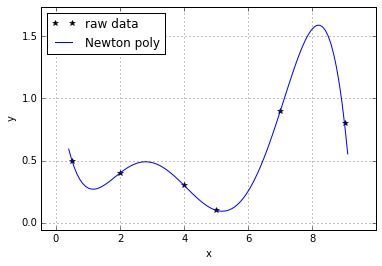

In [9]:
from matplotlib import pylab
import numpy

# consider the above example data again
x=numpy.array([0.5,2.0,4.0,5.0,7.0,9.0])
y=numpy.array([0.5,0.4,0.3,0.1,0.9,0.8])

# evaluate the coefficients a_i recursively using Newton's method
a=y.copy()
m=len(a)
for k in range(1,m):
    for i in range(k,m):
        a[i] = (a[i] - a[k-1])/(x[i]-x[k-1])

# a function to evaluate the Newton polynomial
def eval_poly(a,x,xx):
    n=len(x)-1 # polynomial degree
    # recursively build up polynomial evaluated at xx    
    p=a[n]
    for k in range(1,n+1):
        p = a[n-k] + (xx-x[n-k])*p
    return p

#plot the raw data     
pylab.plot(x,y,'k*',label='raw data')
pylab.margins(0.1)
pylab.xlabel('x');pylab.ylabel('y');pylab.grid(True)
pylab.margins(0.1)

#evaluate the polynomial at high resolution and plot
xx=numpy.linspace(0.4,9.1,100)
pylab.plot(xx,eval_poly(a,x,xx),'b',label='Newton poly')

# add a legend
pylab.legend(loc=0)

### <span style="color:blue">Exercise: ???? </span>

